<a href="https://colab.research.google.com/github/mickynnamdi/Machine-Learning-Stage-two/blob/master/Stage_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing relevant libraries that will help
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"

df = pd.read_csv(url, error_bad_lines= False)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
df.drop(['stab'], axis = 1, inplace=True)

In [8]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [9]:
x = df.drop(columns= 'stabf' )
y = df[ 'stabf' ]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2 , random_state= 1 )
y_train.value_counts()
x_test.count()

tau1    2000
tau2    2000
tau3    2000
tau4    2000
p1      2000
p2      2000
p3      2000
p4      2000
g1      2000
g2      2000
g3      2000
g4      2000
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# standardscaler of the x_train
x_scale = scaler.fit_transform(x_train)
x_scale = pd.DataFrame(x_scale, columns=x_train.columns)

In [13]:
# standardscaler of the x_test
x_testscale = scaler.transform(x_test)
x_testscale = pd.DataFrame(x_testscale, columns=x_test.columns)

RANDOM FORESTCLASSIFIER

In [14]:
from sklearn.ensemble import RandomForestClassifier # importing of a RandomForestClassifier Library

RandomForest = RandomForestClassifier(random_state=1)

RandomForest.fit(x_scale, y_train,)

y_pred_Random = RandomForest.predict(x_testscale)

y_pred_Random


array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [15]:

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
print (confusion_matrix(y_test, y_pred_Random)) # Confusion Matrix

from sklearn.metrics import classification_report # Classification Report
print (classification_report(y_test,y_pred_Random, digits=4))



[[ 625   87]
 [  55 1233]]
              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



INITIAL EXTRATREESCLASSIFIER

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=1)
y_new = model.fit(x_scale, y_train)
y_new = model.predict(x_testscale)
y_new

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [17]:
print (confusion_matrix(y_test, y_new))

from sklearn.metrics import classification_report
print (classification_report(y_test,y_new, digits=4))

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_new)
print( 'Accuracy: {}' .format(accuracy )) 



[[ 606  106]
 [  38 1250]]
              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000

Accuracy: 0.928


XGBCLASSIFIER

In [18]:
#xgboost using gradient boosting
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb.fit(x_scale, y_train)
xgb_predict = xgb.predict(x_testscale)

xgb_predict


array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [19]:

print (confusion_matrix(y_test, xgb_predict))


print (classification_report(y_test,xgb_predict, digits=4))

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=xgb_predict)
print( 'Accuracy: {}' .format(accuracy )) 


[[ 603  109]
 [  52 1236]]
              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000

Accuracy: 0.9195


LGBMCLASSIFIER

In [20]:
# LIGHTGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = 1)
lgbm.fit(x_scale, y_train)
lgbm_pred = lgbm.predict(x_testscale)

lgbm_pred



array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [21]:

print (confusion_matrix(y_test, lgbm_pred))


print (classification_report(y_test,lgbm_pred, digits=4))

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm_pred)
print( 'Accuracy: {}' .format(accuracy )) 

[[ 635   77]
 [  48 1240]]
              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000

Accuracy: 0.9375


In [22]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}



RandomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV
model = ExtraTreesClassifier(random_state=1)
clf = RandomizedSearchCV(model, hyperparameter_grid, random_state=1)
search = clf.fit(x_scale, y_train)
#checking for the best parameter for the model
print(search.best_params_.values())
print(search.best_params_)

dict_values([1000, 2, 8, None])
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


ExtraTreesClassifier after Running your RandomizedSearchCV

In [24]:
tree_param = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state = 1 )
tree_param.fit(x_scale, y_train)
tree_param_pred = tree_param.predict(x_testscale)

In [25]:

print (confusion_matrix(y_test, tree_param_pred))


print (classification_report(y_test,tree_param_pred, digits=4))

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=tree_param_pred)
print( 'Accuracy: {}' .format(accuracy )) 

[[ 619   93]
 [  53 1235]]
              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000

Accuracy: 0.927


In [26]:
feature_importances = search.best_estimator_.feature_importances_
print('Feature Importances: \n', feature_importances)

Feature Importances: 
 [0.13723975 0.1405075  0.13468029 0.13541676 0.00368342 0.00533686
 0.00542927 0.00496249 0.10256244 0.10757765 0.11306268 0.10954089]


In [27]:
sorted(zip(feature_importances, x), reverse = True)

[(0.14050750384993677, 'tau2'),
 (0.13723974766109256, 'tau1'),
 (0.1354167630909727, 'tau4'),
 (0.13468028520386593, 'tau3'),
 (0.11306267999167334, 'g3'),
 (0.10954089174337298, 'g4'),
 (0.10757764577478764, 'g2'),
 (0.10256244080927947, 'g1'),
 (0.005429268421191957, 'p3'),
 (0.005336864710946151, 'p2'),
 (0.004962486591192238, 'p4'),
 (0.003683422151688322, 'p1')]

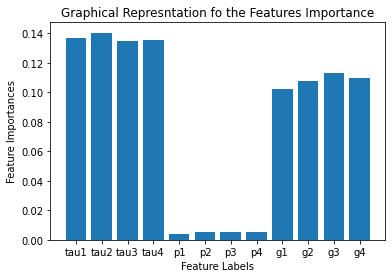

In [28]:
feature_importance_normalized = tree_param.feature_importances_.tolist()
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Graphical Represntation fo the Features Importance')
plt.show()